In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


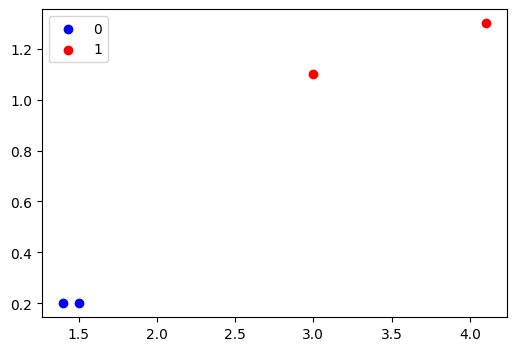

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt

iris = np.genfromtxt('/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/231006/code - update_1/iris_2D_demo.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)
x_data = iris[:, :2]
y_data = iris[:, 2]

x_data_0 = x_data[y_data == 0]
x_data_1 = x_data[y_data == 1]

plt.figure(figsize=(6, 4))
plt.scatter(x_data_0[:, 0], x_data_0[:, 1], color='b', label='0')
plt.scatter(x_data_1[:, 0], x_data_1[:, 1], color='r', label='1')
plt.legend()

In [3]:
N = x_data.shape[0]
intercept = np.ones((N , 1))
x_data = np.concatenate((intercept, x_data), axis=1)

print('x_data \n', x_data)
print('y_data \n', y_data)

x_data 
 [[1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  3.  1.1]
 [1.  4.1 1.3]]
y_data 
 [0. 0. 1. 1.]


In [4]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid_function( np.dot(X.T, theta) )

def loss_function(y_hat, y):
    return -y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

def compute_gradient(X, y_hat, y):
    return X*(y_hat - y)

def update(theta, lr, gradient):
    return theta - lr*gradient

In [5]:
lr = 0.01
max_epoch = 1

theta = np.array([0.1, 0.5, -0.1])
losses = []

for epoch in range(max_epoch):
    for i in range(N):
        X = x_data[i]
        y = y_data[i]
        print(f'X: {X}')
        print(f'y: {y}')

        # compute output
        y_hat = predict(X, theta)
        print(f'y_hat: {y_hat}')

        # compute loss
        loss = loss_function(y_hat, y)
        losses.append(loss.item())
        print(f'loss: {loss}')

        # compute mean of gradient
        gradient = compute_gradient(X, y_hat, y)
        print(f'gradient: {gradient}')

        # update
        theta = update(theta, lr, gradient)
        print(f'theta: {theta}\n\n')

X: [1.  1.4 0.2]
y: 0.0
y_hat: 0.6856801139382539
loss: 1.1573440662232617
gradient: [0.68568011 0.95995216 0.13713602]
theta: [ 0.0931432   0.49040048 -0.10137136]


X: [1.  1.5 0.2]
y: 0.0
y_hat: 0.6917832989653063
loss: 1.1769521686133044
gradient: [0.6917833  1.03767495 0.13835666]
theta: [ 0.08622537  0.48002373 -0.10275493]


X: [1.  3.  1.1]
y: 1.0
y_hat: 0.804280587512403
loss: 0.21780708124253467
gradient: [-0.19571941 -0.58715824 -0.21529135]
theta: [ 0.08818256  0.48589531 -0.10060201]


X: [1.  4.1 1.3]
y: 1.0
y_hat: 0.8753998255485382
loss: 0.13307455350736078
gradient: [-0.12460017 -0.51086072 -0.16198023]
theta: [ 0.08942856  0.49100392 -0.09898221]


